In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [35]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Set the directory path

In [31]:
data_dir = '/kaggle/input/photozilla-1/photozilla'

class_names = []
image_counts = []
image_dimensions = []
sample_images = []

In [32]:
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        class_names.append(folder)
        count = 0
        dimensions = []
        
        for image_name in os.listdir(folder_path):
            if image_name.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, image_name)
                image = Image.open(image_path)
                dimensions.append(image.size)
                if count == 0:
                    sample_images.append(image_path)
                count += 1
        
        image_counts.append(count)
        image_dimensions.append(dimensions)

# Display image distribution

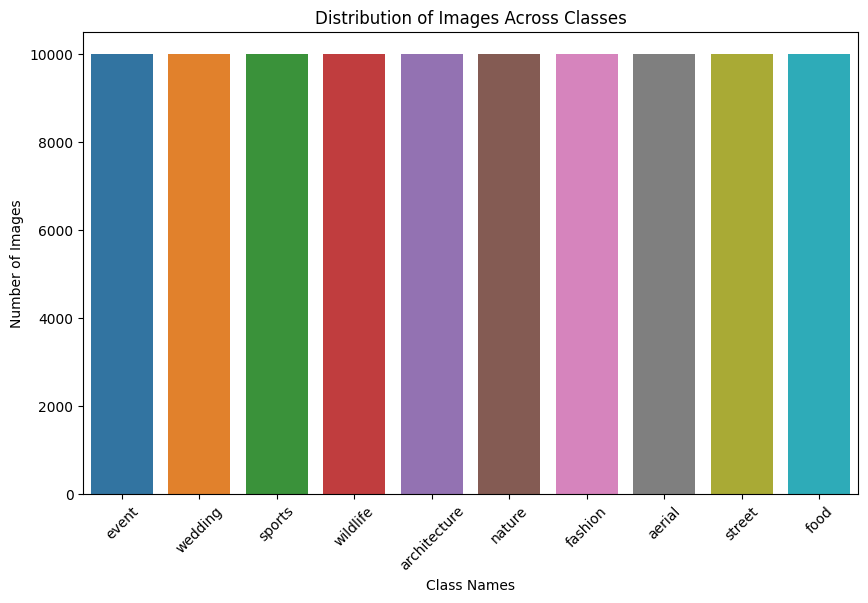

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=image_counts)
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=45)
plt.show()

# Displaying sample images from each class

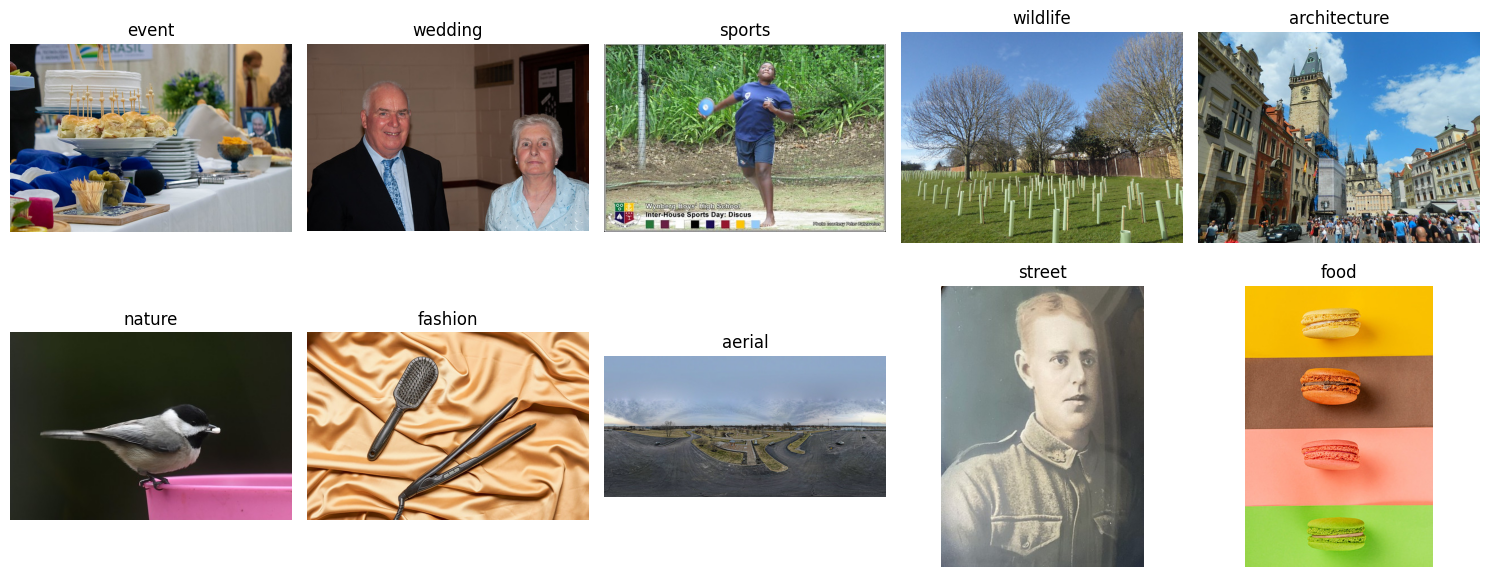

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Prepare data for CSV

In [38]:
data = {
    'Class Name': class_names,
    'Number of Images': image_counts,
    'Image Dimensions': image_dimensions
}

In [39]:
df = pd.DataFrame(data)
data_csv = 'data.csv'
df.to_csv(data_csv, index=False)

In [40]:
df = pd.read_csv(data_csv)
df.head()

Class Name  Number of Images  \
0         event             10000   
1       wedding             10000   
2        sports             10000   
3      wildlife             10000   
4  architecture             10000   

                                    Image Dimensions  
0  [(499, 333), (500, 262), (499, 333), (500, 333...  
1  [(500, 332), (329, 500), (335, 500), (499, 333...  
2  [(499, 333), (499, 333), (499, 333), (499, 333...  
3  [(500, 375), (500, 361), (499, 333), (500, 375...  
4  [(500, 375), (499, 333), (470, 500), (499, 333...

# EDA

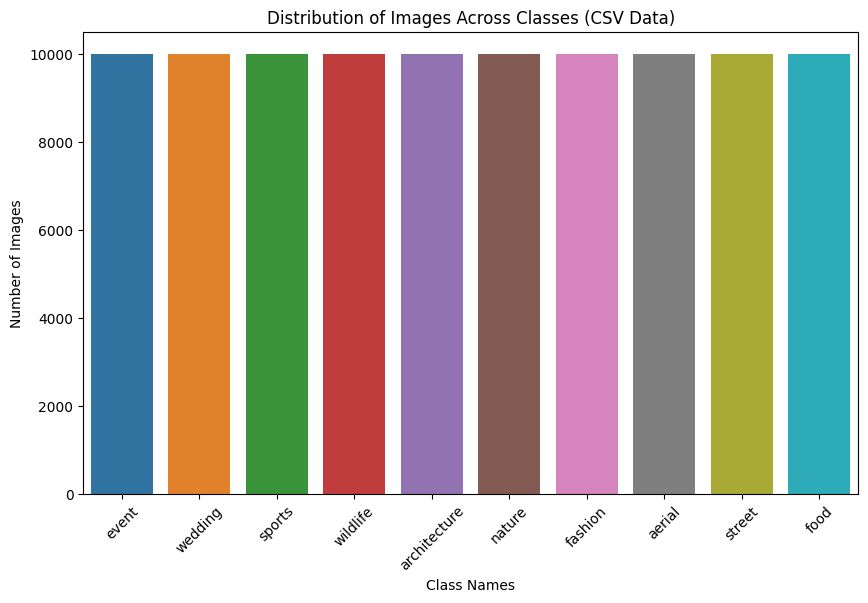

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class Name', y='Number of Images', data=df)
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes (CSV Data)')
plt.xticks(rotation=45)
plt.show()

In [42]:
image_dimensions_flat = [dim for sublist in image_dimensions for dim in sublist]

dimensions_df = pd.DataFrame(image_dimensions_flat, columns=['Width', 'Height'])
dimensions_df['Class'] = df['Class Name'].repeat(df['Number of Images']).values

In [43]:
fig = px.scatter_3d(dimensions_df, x='Width', y='Height', z=df.index.repeat(df['Number of Images']),
                    color=df['Class Name'].repeat(df['Number of Images']),
                    title='3D Scatter Plot of Image Dimensions')
fig.show()

# Histogram

In [44]:
fig = px.histogram(dimensions_df, x="Width", nbins=20, title="Histogram of Image Widths")
fig.show()

fig = px.histogram(dimensions_df, x="Height", nbins=20, title="Histogram of Image Heights")
fig.show()

# Box plot

In [45]:
fig = px.box(dimensions_df, x='Class', y='Width', title='Box Plot of Image Widths per Class')
fig.show()

fig = px.box(dimensions_df, x='Class', y='Height', title='Box Plot of Image Heights per Class')
fig.show()

# Correlation heatmap

In [48]:
corr_matrix = dimensions_df[['Width', 'Height']].corr()
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)

fig.update_layout(title="Correlation Heatmap of Image Dimensions")
fig.show()